# Stock Sentiment Analysis

## 1. Dataset preparation

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("/content/Stock Headlines.csv",encoding = 'ISO-8859-1')

In [3]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [4]:
df.shape

(4101, 27)

In [5]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

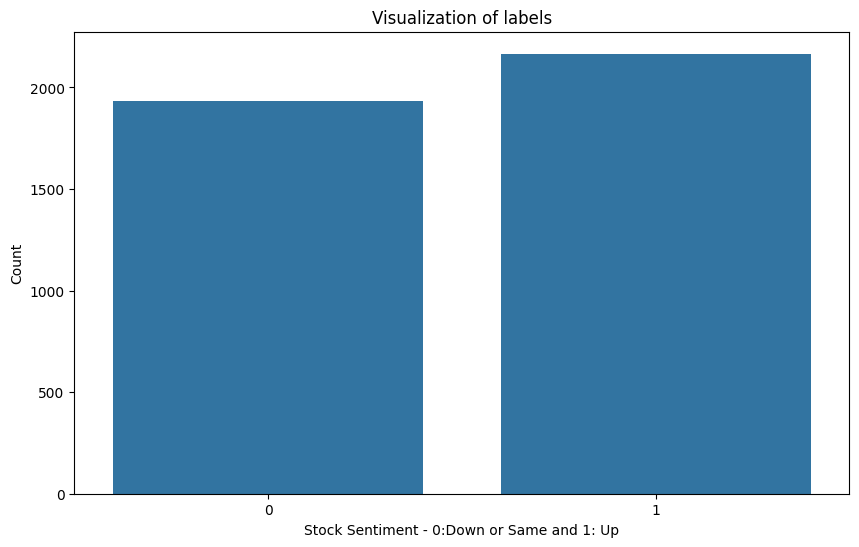

In [7]:
## See how many labels are 0 and how many are 1
plt.figure(figsize=(10,6))
sns.countplot(x='Label',data=df)
plt.xlabel('Stock Sentiment - 0:Down or Same and 1: Up')
plt.ylabel('Count')
plt.title("Visualization of labels")
plt.show()

## 2. Data Cleaning and Pre-processing

### 2.1 Check for any NaN values, if present remove them

In [8]:
df.isna().any()

,0
Date,False
Label,False
Top1,False
Top2,False
Top3,False
Top4,False
Top5,False
Top6,False
Top7,False
Top8,False


In [9]:
df.shape

(4101, 27)

In [10]:
#Dropping the NaN values:
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [11]:
#Create a copy of the original df and make changes to that one only
df_copy=df.copy()
df_copy.reset_index(inplace=True) # This line makes sure that the indicies that were dropped get the actual value assigned to them and
# consective indicies are maintained in the df

### 2.2 Dataset Splitting

Splitting the dataset into training and testing sets is a critical step in machine learning workflows:

Training Set: Used to train the model. The model learns patterns and relationships from this data.
Testing Set: Used to evaluate the model's performance on unseen data, ensuring it generalizes well.

How to split data here?

We will use a time/date based split. Since the dataset follows a chronological order it is more easy for us to split it on the basis of date/time.

In [12]:
train=df_copy[df_copy['Date']<'20150101']
test=df_copy[df_copy['Date']>'20141231']
print('Train Size: {}, Test Size: {}'.format(train.shape,test.shape))

Train Size: (3972, 28), Test Size: (378, 28)


In [13]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [14]:
#Isolating the Label column from the test and train split of the dataset
y_train=train['Label']
train = train.iloc[:,3:28] #train will have top1,top2......,top25
y_test=test['Label']
test=test.iloc[:,3:28] #test will also have the above

## 3.Performing NLP

### 3.1 Importing Libraries

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 3.2 Remove punctuations and special chars from the text


In [16]:
train.replace(to_replace='[^a-zA-Z]',value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]',value=' ', regex=True, inplace=True)

### 3.3 Renaming the columns
The columns are currently named as Top1, Top2 and so on so we will simply name them "0", "1" to maintain consistency

In [17]:
new_cols=[str(i) for i in range(0,25)]
train.columns=new_cols
test.columns=new_cols

### 3.4 Converting the entire dataframe to lowercase

In [18]:
for i in new_cols:
  train[i]=train[i].str.lower()
  test[i]=test[i].str.lower()

### 3.5 Joining all the columns
By combining all the top 25 headlines into a single string, you effectively treat the day's news as a single document or article. This makes the text analysis simpler:

**Feature Extraction:**
When we vectorize this single string (using methods like TF-IDF or Word2Vec), we treat it as one feature (the combined news for that day), rather than processing each headline individually.
**Contextual Understanding:**
The model will be able to understand the context of the news for that day based on all headlines, which could provide a more accurate sentiment or topic prediction.



In [19]:
train_headlines=[]
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row,0:25]))
#iloc is used to index into the DataFrame by row and column. Here, it selects all the values in the row (row) from columns 0 to 24 (which correspond to the top 25 headlines).
#Each value in the row (headline) is converted to a string using str(x), ensuring that non-string data types are properly handled.

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row,0:25]))

In [20]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

### 3.6 Creating corpus for dataset

**Why**?
Text data is usually messy and needs to be processed before it's used in machine learning models. In this step:

**Tokenization** splits the text into smaller units (usually words).
**Stopwords Removal** filters out common words that don’t contribute meaningful information.
**Stemming** reduces words to their root form (e.g., "running" → "run").
These steps ensure that the data is cleaner and ready for vectorization, which will convert the text into numerical features for model training.



In [21]:
ps=PorterStemmer()
train_corpus=[]

for i in range(0,len(train_headlines)):
  #Tokenize words
  words=train_headlines[i].split()
  #split splits a string into list of words -> Thus forms the tokens

  #Stopwords removal
  words = [word for word in words if word not in set(stopwords.words('english'))]
  #stopwords.words('english') gives a list of English stopwords from the NLTK library.

  #Stemming words
  words = [ps.stem(word) for word in words] #ps.stem(word) applies the Porter Stemmer to each word in the words list.
  #After stemming words will look like this: words = ["stock", "go", "up"]

  #join the stemmed words together
  headline=' '.join(words)
  #"stock go up" this will be the joined words

  #Building corpus
  train_corpus.append(headline)


In [22]:
test_corpus=[]
for i in range(0,len(test_headlines)):
  words=test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline=' '.join(words)
  test_corpus.append(headline)

In [23]:
train_corpus[0:5]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

### 3.7 Splitting the training headlines based on labels

In [24]:
stock_down_words = []
for i in list(y_train[y_train==0].index):
  stock_down_words.append(train_corpus[i])

stock_up_words = []
for i in list(y_train[y_train==1].index):
  stock_up_words.append(train_corpus[i])

### 3.8 Creating Bag of Words Model

The Bag of Words (BoW) model is a text representation method used in Natural Language Processing (NLP) and Machine Learning. It transforms text into a format that machine learning algorithms can understand, by representing text as a vector of word frequencies.

The key idea is simple:

Ignore grammar and word order.
Focus on the frequency of words.

Steps Involved in BoW:

**Tokenization**: Split the text into individual words (tokens).

**Vocabulary Creation**: Create a list (or dictionary) of all unique words found in the corpus (the entire dataset).

**Vectorization**: For each document (text or sentence), create a vector that represents the frequency of each word in the vocabulary. Each word from the vocabulary corresponds to a dimension in the vector.

**Count the Occurrences**: The vector for each document is filled with the number of times each word appears in the document.

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer converts collection of text docs into matrix of token counts
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
#ngram_range=(2,2) means we are using bigrams (seq of two consecutive words)
# eg., Sentence: "machine learning is great"
# Bigrams: ["machine learning", "learning is", "is great"]
X_train = cv.fit_transform(train_corpus).toarray()

In [26]:
X_test = cv.transform(test_corpus).toarray()

## 4. Model Building and comparative study

Goal: Is to predict whether the sentiment will be 0 or 1 - binary classification problem!

Strategy for model deployment:

1. Logistic Regression
2. Naive Beyes
3. SVM
4. Random Forest
5. Neural Networks

### 4.1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
lr_y_pred=lr.predict(X_test)

In [29]:
accuracyScore = accuracy_score(y_test,lr_y_pred)
recallScore = recall_score(y_test,lr_y_pred)
precisionScore = precision_score(y_test,lr_y_pred)

In [30]:
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr_y_pred)
cm

array([[162,  24],
       [ 29, 163]])

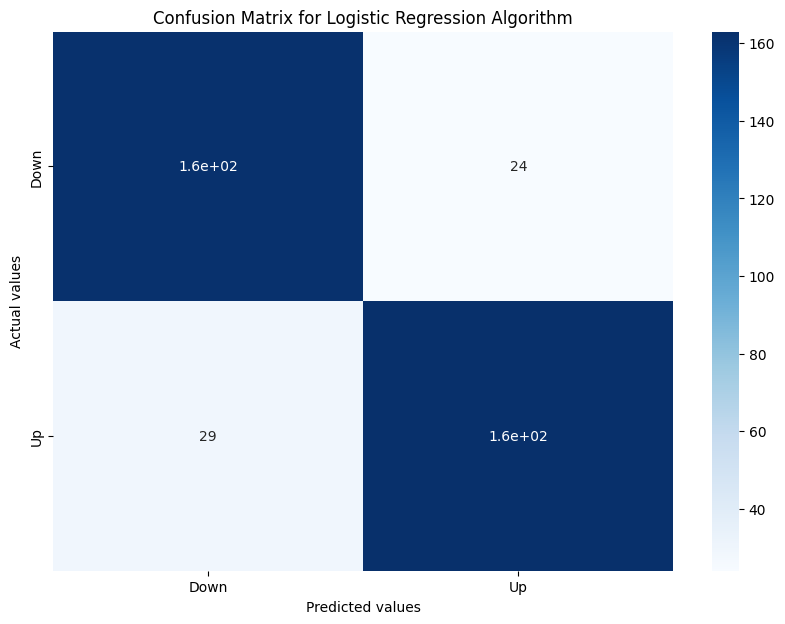

In [32]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

### 4.2 Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_classifier.fit(X_train,y_train)
#using 200 Decision Trees
#'entropy' uses the information gain to decide the best split at each node. This is one of the splitting methods, the alternative being 'gini' (Gini impurity).
#'entropy' is generally preferred when the data is highly varied, as it tends to make more informative splits.

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [34]:
rf_y_pred = rf_classifier.predict(X_test)

In [35]:
accuracyScore=accuracy_score(y_test,rf_y_pred)
precisionScore=precision_score(y_test,rf_y_pred)
recallScore=recall_score(y_test,rf_y_pred)
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 82.8%
Precision score is: 0.81
Recall score is: 0.87


### 4.3 Multinomial Naive Beyes

***Imp Theory***

MultinomialNB: This is a specific variant of Naive Bayes used for discrete features, especially when the features represent counts or frequencies. It assumes that the features follow a multinomial distribution.

**Why Multinomial Naive Bayes?**

Multinomial Naive Bayes is specifically used for text classification tasks like sentiment analysis, document classification, etc., where the features are typically word counts (or occurrences of terms in a document).

In such tasks, the assumption is that the counts of words in a document can be modeled using a multinomial distribution, where each feature (word) contributes independently to the likelihood of the class label.

**For example:**

If you're classifying a text as either "positive" or "negative" sentiment, the feature would be the frequency of words like "good," "bad," "happy," "sad", etc. Each word (feature) is treated as an independent count, and the multinomial distribution helps model these frequencies.

**When is MultinomialNB used?**

Text Classification: When you're working with word counts (e.g., in a Bag-of-Words or TF-IDF model).

Discrete data: It’s suitable when the features are counts or the frequency of occurrences of different items (e.g., word frequencies in a document).


In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
# Predicting the Test set results
nb_y_pred = nb.predict(X_test)

In [38]:
accuracyScore=accuracy_score(y_test,nb_y_pred)
precisionScore=precision_score(y_test,nb_y_pred)
recallScore=recall_score(y_test,nb_y_pred)
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


### 4.4 SVM

In [39]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
svm_y_pred=svm.predict(X_test)

In [41]:
accuracyScore=accuracy_score(y_test,svm_y_pred)
precisionScore=precision_score(y_test,svm_y_pred)
recallScore=recall_score(y_test,svm_y_pred)
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 84.92%
Precision score is: 0.89
Recall score is: 0.81


### 4.5 Neural Networks

In [45]:
!pip install tensorflow

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [57]:
from tensorflow.keras import regularizers

nn=Sequential()
#First Hidden Layer
nn.add(Dense(units=128,activation='relu',input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)))
nn.add(Dropout(0.5))
#Second hidden layer
nn.add(Dense(units=64,activation='relu'))
nn.add(Dropout(0.5))
#Output layer
nn.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [59]:
#Training the model
history=nn.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5252 - loss: 1.3276 - val_accuracy: 0.6640 - val_loss: 0.8384
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5817 - loss: 0.8488 - val_accuracy: 0.6905 - val_loss: 0.8791
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 0.9279 - val_accuracy: 0.7566 - val_loss: 0.9403
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7248 - loss: 0.9485 - val_accuracy: 0.7910 - val_loss: 0.9641
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.9573 - val_accuracy: 0.8042 - val_loss: 0.9515
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.9391 - val_accuracy: 0.8175 - val_loss: 0.9858
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8309 - loss: 0.9563 - val_accuracy: 0.8413 - val_loss: 0.9165
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.9256 - val_accuracy: 0

In [60]:
nn_y_pred=nn.predict(X_test)
nn_y_pred=(nn_y_pred>0.5) #convert probabilities to binary predictions i.e., 0 or 1

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [61]:
accuracyScore=accuracy_score(y_test,nn_y_pred)
precisionScore=precision_score(y_test,nn_y_pred)
recallScore=recall_score(y_test,nn_y_pred)
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 83.33%
Precision score is: 0.82
Recall score is: 0.86


## Predictions

In [102]:
import re
def prediction(sample_headline):
  sample_headline=re.sub(pattern='[^a-zA-Z]', repl=' ',string=sample_headline)
  #re.sub() is used to replace the occurences of a pattern in the input string
  sample_headline=sample_headline.lower() #convert to lower case
  #tokenization
  sample_headline_words=sample_headline.split()
  #remove stop words
  sample_headline_words=[word for word in sample_headline_words if word not in set(stopwords.words('english'))]
  #stemming
  ps=PorterStemmer()
  final_headline=[]
  sample_headline_words=[ps.stem(word) for word in sample_headline_words]
  final_headline=' '.join(sample_headline_words)
  #join stem into a single string
  final_headline=' '.join(final_headline)
  #vectorization
  temp=cv.transform([final_headline]).toarray() #cv -> CountVectorizer that converts text data to numerical data
  return lr.predict(temp)



In [103]:
from random import randint

In [104]:
sample_test=df_copy[df_copy['Date'] > '20141231']

In [105]:
sample_test.reset_index(inplace=True)
sample_test=sample_test['Top1']


In [106]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)


Kim Jong-un orders nuclear weapons to be made ready for use


In [107]:
if(prediction(sample_headline)==1):
  print('The stock price will go up')
else:
  print('The stock price will go down or will remain the same')

The stock price will go up


In [108]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)==1):
  print('The stock price will go up')
else:
  print('The stock price will go down or will remain the same')


Belgium Tells Facebook to Stop Storing Data From Non-Users - Facebook faces a fine of 250,000 euros ($269,000) a day if it doesnt comply
The stock price will go up


In [109]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)):
  print('The stock price will go down or remain same')
else:
  print('The stock price will go up!')


Models must have doctor's note to prove they are not too thin, France rules
The stock price will go down or remain same


In [110]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)):
  print('The stock price will go down or remain same')
else:
  print('The stock price will go up!')


I gave the order myself  Turkish PM on downing Russian plane
The stock price will go down or remain same


In [111]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)):
  print('The stock price will go down or remain same')
else:
  print('The stock price will go up!')


Germanwings Pilot Was Locked Out of Cockpit Before Crash in France
The stock price will go down or remain same


In [112]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)):
  print('The stock price will go down or remain same')
else:
  print('The stock price will go up!')


2,500 Scientists To Australia: If You Want To Save The Great Barrier Reef, Stop Supporting Coal
The stock price will go down or remain same


In [113]:
row=randint(0,sample_test.shape[0]-1)
sample_headline=sample_test[row]
print(sample_headline)
if(prediction(sample_headline)):
  print('The stock price will go down or remain same')
else:
  print('The stock price will go up!')


Canada Aboriginals Reject $960 Million Petronas Gas Deal. An aboriginal group along Canadas Pacific Coast turned down Petroliam Nasional Bhd.s offer of C$319,000 ($267,000) for each member as compensation for building a natural gas export terminal on ancestral lands.
The stock price will go down or remain same
